In [1]:
from autogluon.tabular import TabularDataset, TabularPredictor
import numpy as np
import math

/home/witvoetk/anaconda3/envs/tf/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
train_data = TabularDataset(f'Data/phil_rangedata_train.csv')
train_data.head()

,initial_SOC,final_SOC,altitude,avg_speed,total_distance
0,100.000031,100.000031,-3.061713,7.642350,4585.410159
1,100.000031,100.000031,-0.397832,4.726447,2822.495564
2,100.000031,99.607872,-2.267668,5.793851,3476.310818
3,100.000031,99.215721,-10.155657,11.395269,6837.161613
4,99.607872,97.254936,-10.348317,19.169618,11486.297899


In [3]:
label = 'final_SOC'
train_data[label].describe()

count    1795.000000
mean       64.151321
std        24.455020
min        10.588239
25%        43.921581
50%        69.411789
75%        84.705910
max       100.000031
Name: final_SOC, dtype: float64

In [4]:
predictor = TabularPredictor(label=label,eval_metric='root_mean_squared_error').fit(
    train_data, 
    presets=['best_quality'], 
    time_limit = 60,
    verbosity=1) 

No path specified. Models will be saved in: "AutogluonModels/ag-20230421_004056/"
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == float and many unique label-values observed).
	If 'regression' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])


In [6]:
test_data = TabularDataset(f'Data/phil_rangedata_test.csv')

#  only keep rows 81 and 87
test_data = test_data.iloc[[79,85]]

y_pred = predictor.predict(test_data.drop(columns=[label]))



In [7]:
predictor.evaluate(test_data, silent=True)

/home/witvoetk/anaconda3/envs/tf/lib/python3.10/site-packages/autogluon/tabular/predictor/predictor.py:1420: FutureWarning: Calling `predictor.predict_proba` when problem_type=regression will raise an AssertionError starting in AutoGluon v0.8. Please call `predictor.predict` instead.
  warnings.warn(


{'root_mean_squared_error': -22.064442284993298,
 'mean_squared_error': -486.8396133478002,
 'mean_absolute_error': -16.97923565104736,
 'r2': -86.93537985753908,
 'pearsonr': -1.0,
 'median_absolute_error': -16.97923565104736}

In [8]:
predictor.leaderboard(test_data, silent=True)

,model,score_test,score_val,pred_time_test,pred_time_val,fit_time,pred_time_test_marginal,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,KNeighborsUnif_BAG_L1,-11.893936,-19.064515,0.052950,0.124226,0.007476,0.052950,0.124226,0.007476,1,True,1
1,KNeighborsDist_BAG_L1,-18.498792,-17.753467,0.057161,0.128392,0.008016,0.057161,0.128392,0.008016,1,True,2
2,LightGBMXT_BAG_L1,-22.064442,-2.924457,0.177174,0.050980,4.782548,0.177174,0.050980,4.782548,1,True,3
3,WeightedEnsemble_L2,-22.064442,-2.924457,0.178850,0.051450,4.912368,0.001676,0.000470,0.129820,2,True,5
4,LightGBM_BAG_L1,-47.097072,-23.274935,0.008786,0.006224,0.321095,0.008786,0.006224,0.321095,1,True,4


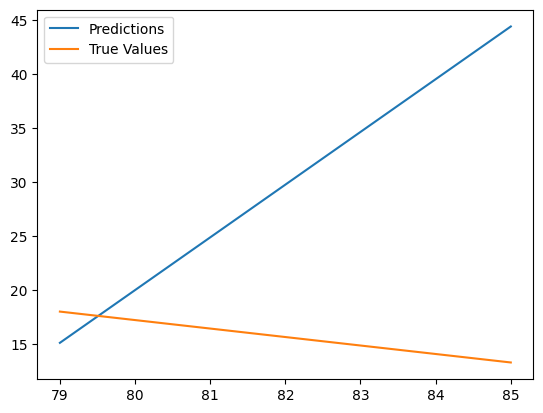

In [9]:
#plots the predicted vs actual values of the top performing model using matplotlib
import matplotlib.pyplot as plt
plt.plot(y_pred, label="Predictions")
plt.plot(test_data[label], label="True Values")
plt.legend()
plt.show()

In [10]:
mse_test = np.mean(((y_pred - test_data[label])**2))
rmse_test = math.sqrt(mse_test)
print("test data rmse", rmse_test)

test data rmse 22.064442284993298


In [12]:
test_data1 = TabularDataset(f'Data/phil_rangedata_test1.csv')
y_pred1 = predictor.predict(test_data1.drop(columns=[label]))


In [13]:
predictor.evaluate(test_data1, silent=True)

/home/witvoetk/anaconda3/envs/tf/lib/python3.10/site-packages/autogluon/tabular/predictor/predictor.py:1420: FutureWarning: Calling `predictor.predict_proba` when problem_type=regression will raise an AssertionError starting in AutoGluon v0.8. Please call `predictor.predict` instead.
  warnings.warn(


{'root_mean_squared_error': -3.997338068270483,
 'mean_squared_error': -15.978711632044398,
 'mean_absolute_error': -1.7045559549392069,
 'r2': 0.9754354809071547,
 'pearsonr': 0.9877694661528225,
 'median_absolute_error': -0.6429023782226579}

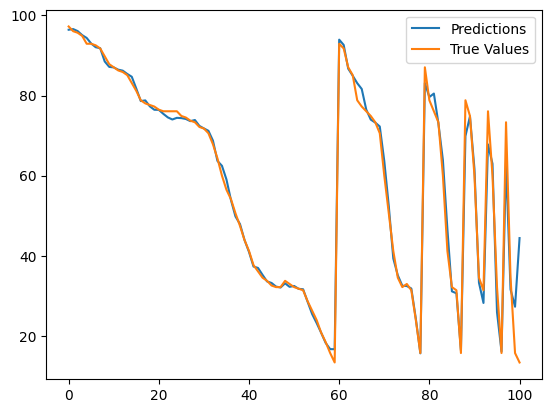

In [18]:
#plot the predicted vs true values for test data1
plt.plot(y_pred1, label="Predictions")
plt.plot(test_data1[label], label="True Values")
plt.legend()
plt.show()

In [15]:
#test test data 2
test_data2 = TabularDataset(f'Data/phil_rangedata_test2.csv')
y_pred2 = predictor.predict(test_data2.drop(columns=[label]))

predictor.evaluate(test_data2, silent=True)

/home/witvoetk/anaconda3/envs/tf/lib/python3.10/site-packages/autogluon/tabular/predictor/predictor.py:1420: FutureWarning: Calling `predictor.predict_proba` when problem_type=regression will raise an AssertionError starting in AutoGluon v0.8. Please call `predictor.predict` instead.
  warnings.warn(


{'root_mean_squared_error': -1.386128697395157,
 'mean_squared_error': -1.9213527657423948,
 'mean_absolute_error': -0.9623586213005182,
 'r2': 0.987086157471998,
 'pearsonr': 0.993818191988161,
 'median_absolute_error': -0.6301116980419934}

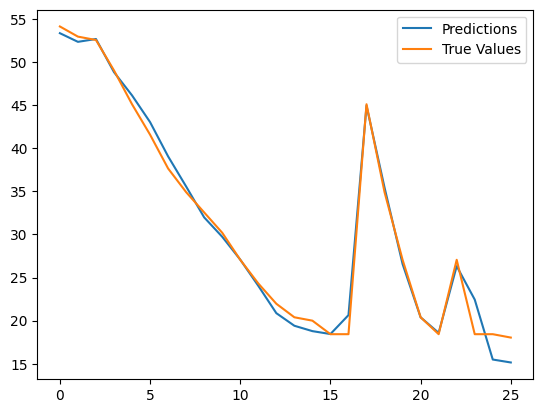

In [16]:
#plot the predicted vs true values for test data2
plt.plot(y_pred2, label="Predictions")
plt.plot(test_data2[label], label="True Values")
plt.legend()
plt.show()

In [ ]:
# save each test to a csv file with 2 columns: predicted and true
import csv
with open('Data/phil_rangedata_test1_pred.csv', 'w', newline='') as csvfile:
    writer = csv.writer(csvfile, delimiter=',')
    writer.writerow(['predicted', 'true'])
    for i in range(len(y_pred1)):
        writer.writerow([y_pred1[i], test_data1[label][i]])

with open('Data/phil_rangedata_test2_pred.csv', 'w', newline='') as csvfile:
    writer = csv.writer(csvfile, delimiter=',')
    writer.writerow(['predicted', 'true'])
    for i in range(len(y_pred2)):
        writer.writerow([y_pred2[i], test_data2[label][i]])

with open('Data/phil_rangedata_test_pred.csv', 'w', newline='') as csvfile:
    writer = csv.writer(csvfile, delimiter=',')
    writer.writerow(['predicted', 'true'])
    for i in range(len(y_pred)):
        writer.writerow([y_pred[i], test_data[label][i]])

        

